In [1]:
import pandas as pd 
import get_features 
import librosa
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#emotion_code = int(file.split("-")[2])
df = pd.DataFrame(columns=[f'mfcc_mean_{i}' for i in range(1, 14)] +
    [f'mfcc_std_{i}' for i in range(1, 14)] +
    [f'chroma_mean_{i}' for i in range(1, 13)] +
    [f'spectral_contrast_mean_{i}' for i in range(1, 8)] +
    [f'tonnetz_mean_{i}' for i in range(1, 7)] +
    ['zcr_mean', 'rms_mean', 'pitch_mean', 'emotion', 'intensity'])
df

,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,...,tonnetz_mean_2,tonnetz_mean_3,tonnetz_mean_4,tonnetz_mean_5,tonnetz_mean_6,zcr_mean,rms_mean,pitch_mean,emotion,intensity


In [3]:
# path = 'archive/Actor_01/03-01-07-02-01-01-01.wav'
# file_name = '03-01-07-02-01-01-01.wav'
def add_to_df(path, file_name, df):
    y, sr = librosa.load(path)
    features = get_features.get_features(y, sr)
    emotion = int(file_name.split('-')[2])
    intensity = int(file_name.split('-')[3])

    row_data = dict()

    #13 MFCCs
    for i, val in enumerate(features['mfcc_mean']):
        row_data[f'mfcc_mean{i+1}'] = val

    for i, val in enumerate(features['mfcc_mean']):
        row_data[f'mfcc_std{i+1}'] = val

    #12 chromas
    for i, val in enumerate(features['chroma_mean']):
        row_data[f'chroma_mean{i+1}'] = val

    #7 spectral contrasts
    for i, val in enumerate(features['spectral_contrast_mean']):
        row_data[f'spectral_contrast_mean{i+1}'] = val

    #6 tonnetz
    for i, val in enumerate(features['tonnetz_mean']):
        row_data[f'tonnetz_mean{i+1}'] = val

    row_data['zcr_mean'] = features['zcr_mean']
    row_data['rms_mean'] = features['rms_mean']
    row_data['pitch_mean'] = features['pitch_mean']
    row_data['emotion'] = emotion
    row_data['intensity'] = intensity

    newdf = pd.DataFrame([row_data])

    df = pd.concat([df, newdf], ignore_index = True)

    return df


In [4]:
for i in range(1,25):
    if i < 10:
        num = f"0{i}"
    else:
        num = str(i)
    
    for file_name in os.listdir(f"archive/Actor_{num}"):
        df = add_to_df(f"archive/Actor_{num}/{file_name}", file_name,df)

df.head()

{'mfcc_mean': array([-6.9779260e+02,  5.4890041e+01,  6.6346538e-01,  1.2435786e+01,
        7.7339506e+00,  5.3075027e-01, -3.2166309e+00, -3.1593943e+00,
       -1.0977551e+01, -2.8487110e+00,  8.1529731e-01, -3.0370669e+00,
        1.9554465e+00], dtype=float32), 'mfcc_std': array([183.03044 ,  72.16848 ,  19.195799,  20.930754,  17.33931 ,
        13.761338,  10.853388,  11.505454,  17.019814,   8.8651  ,
         8.669751,   9.678136,   9.780213], dtype=float32), 'chroma_mean': array([0.65504473, 0.6107409 , 0.56857884, 0.57231134, 0.5553723 ,
       0.5292927 , 0.5870647 , 0.63835496, 0.6429177 , 0.60642225,
       0.6101092 , 0.60403866], dtype=float32), 'spectral_contrast_mean': array([19.06341555, 11.11139787, 14.83170263, 14.06422015, 14.78303578,
       16.76310354, 45.34624582]), 'tonnetz_mean': array([-0.04695789,  0.02399028, -0.05111247, -0.04818078,  0.01331385,
        0.00884663]), 'zcr_mean': np.float64(0.3727122486888112), 'rms_mean': np.float32(0.002256089), 'pitch

C:\Users\callu\AppData\Local\Temp\ipykernel_21352\1439625986.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, newdf], ignore_index = True)


{'mfcc_mean': array([-6.9285577e+02,  5.5363895e+01, -1.5483193e+00,  1.6038307e+01,
        8.8188105e+00, -1.4658618e-01, -1.3733917e+00, -5.2931800e+00,
       -1.1623182e+01, -1.3482835e+00,  8.4371448e-01, -2.6412783e+00,
        1.0172497e+00], dtype=float32), 'mfcc_std': array([185.0503  ,  66.308495,  19.290407,  19.345299,  17.269623,
        12.09633 ,  10.994115,  11.992072,  17.111732,   8.362707,
         9.127845,   9.430248,   9.277678], dtype=float32), 'chroma_mean': array([0.5984626 , 0.6235729 , 0.58694047, 0.5343608 , 0.5340769 ,
       0.5540823 , 0.4952445 , 0.5469142 , 0.5820278 , 0.6303775 ,
       0.62802523, 0.62193036], dtype=float32), 'spectral_contrast_mean': array([19.70180133, 12.05881354, 15.65353777, 14.88492348, 15.12480035,
       16.8430684 , 44.91822684]), 'tonnetz_mean': array([-0.08656287,  0.03963699, -0.06151708, -0.06871629,  0.03036782,
        0.0014576 ]), 'zcr_mean': np.float64(0.3805508083767361), 'rms_mean': np.float32(0.0024186159), 'pitc

C:\Users\callu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=1012
  warnings.warn(


{'mfcc_mean': array([-7.2986322e+02,  6.4629524e+01,  8.5279169e+00,  1.3229140e+01,
        9.2632256e+00,  3.5335720e+00,  5.5179650e-01, -6.4787264e+00,
       -4.6929135e+00,  2.5857427e+00,  6.0769278e-01, -1.2363276e+00,
        6.2950892e+00], dtype=float32), 'mfcc_std': array([182.78268 ,  65.13234 ,  25.581259,  16.371014,  16.514486,
        11.966619,  11.3285  ,  16.393625,  14.188896,   8.176531,
         9.076637,   8.262509,   9.310259], dtype=float32), 'chroma_mean': array([0.6147312 , 0.562573  , 0.5744762 , 0.5631274 , 0.5810845 ,
       0.5907806 , 0.56572616, 0.603823  , 0.6040089 , 0.62222975,
       0.68067616, 0.6532308 ], dtype=float32), 'spectral_contrast_mean': array([18.32045204, 13.25848754, 15.88913869, 14.39562828, 16.2680845 ,
       16.79974038, 45.93138134]), 'tonnetz_mean': array([-0.02433445,  0.00161933, -0.02475301,  0.02207299,  0.02660803,
       -0.00531723]), 'zcr_mean': np.float64(0.30647145669291337), 'rms_mean': np.float32(0.0015906543), 'pit

,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,...,spectral_contrast_mean4,spectral_contrast_mean5,spectral_contrast_mean6,spectral_contrast_mean7,tonnetz_mean1,tonnetz_mean2,tonnetz_mean3,tonnetz_mean4,tonnetz_mean5,tonnetz_mean6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.064220,14.783036,16.763104,45.346246,-0.046958,0.023990,-0.051112,-0.048181,0.013314,0.008847
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.884923,15.124800,16.843068,44.918227,-0.086563,0.039637,-0.061517,-0.068716,0.030368,0.001458
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.242442,15.348364,16.694574,45.031481,-0.034986,-0.001652,0.000582,-0.005397,0.006597,0.028585
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.362149,15.282212,16.067050,44.119110,-0.054371,0.016376,0.003958,-0.039613,0.002856,0.012278
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.201859,15.564874,16.215825,44.607496,-0.078047,0.020000,0.018477,-0.117996,0.025580,0.006804


In [13]:
ndf = df.dropna(axis=1)
print(ndf.columns.unique())
# dropped = df.columns.difference(ndf.columns)
# print("Dropped columns:", dropped.tolist())
print(ndf.columns)



Index(['zcr_mean', 'rms_mean', 'pitch_mean', 'emotion', 'intensity',
       'mfcc_mean1', 'mfcc_mean2', 'mfcc_mean3', 'mfcc_mean4', 'mfcc_mean5',
       'mfcc_mean6', 'mfcc_mean7', 'mfcc_mean8', 'mfcc_mean9', 'mfcc_mean10',
       'mfcc_mean11', 'mfcc_mean12', 'mfcc_mean13', 'mfcc_std1', 'mfcc_std2',
       'mfcc_std3', 'mfcc_std4', 'mfcc_std5', 'mfcc_std6', 'mfcc_std7',
       'mfcc_std8', 'mfcc_std9', 'mfcc_std10', 'mfcc_std11', 'mfcc_std12',
       'mfcc_std13', 'chroma_mean1', 'chroma_mean2', 'chroma_mean3',
       'chroma_mean4', 'chroma_mean5', 'chroma_mean6', 'chroma_mean7',
       'chroma_mean8', 'chroma_mean9', 'chroma_mean10', 'chroma_mean11',
       'chroma_mean12', 'spectral_contrast_mean1', 'spectral_contrast_mean2',
       'spectral_contrast_mean3', 'spectral_contrast_mean4',
       'spectral_contrast_mean5', 'spectral_contrast_mean6',
       'spectral_contrast_mean7', 'tonnetz_mean1', 'tonnetz_mean2',
       'tonnetz_mean3', 'tonnetz_mean4', 'tonnetz_mean5', 'tonnetz_mea

In [15]:
mfcc_means = ndf.groupby("emotion")[[f'mfcc_mean{i}' for i in range(1, 14)]].mean()
mfcc_means

,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_mean6,mfcc_mean7,mfcc_mean8,mfcc_mean9,mfcc_mean10,mfcc_mean11,mfcc_mean12,mfcc_mean13
emotion,,,,,,,,,,,,,
1,-679.331848,58.064831,2.769017,12.075057,4.746350,-1.657703,-2.914273,-7.169071,-5.006970,-1.293350,-2.045746,-2.357701,-1.304559
2,-685.864563,59.167877,4.718825,12.845901,5.460007,-0.109152,-3.880095,-6.835960,-3.914849,-1.338550,-1.433407,-2.824525,-1.911936
3,-554.136658,46.012287,-12.198635,6.229407,0.261652,-6.581204,-7.311591,-9.485680,-8.202483,-2.335009,-4.148003,-3.657809,-2.229136
4,-639.442078,54.128719,-1.898446,10.297732,3.787750,-3.100695,-5.545570,-9.668555,-7.333188,-1.580992,-3.473254,-3.647740,-1.173009
5,-478.452911,38.497448,-12.378559,4.554641,-4.399586,-7.748398,-4.608495,-8.651540,-8.707544,-2.640061,-3.527595,-3.758595,-2.111573
6,-533.206665,38.693485,-11.208904,4.314154,-0.817206,-6.113735,-7.670558,-10.733130,-7.412639,-1.494832,-3.657139,-3.448465,-0.887432
7,-594.867432,51.204056,-2.668143,7.768089,-0.556584,-4.164867,-6.394326,-8.816979,-6.021757,-1.556840,-3.252445,-3.328772,-2.475986
8,-585.307800,46.076382,-4.487377,5.470802,-1.099813,-5.054940,-5.788352,-8.889180,-6.357257,-2.965217,-4.253396,-4.154410,-3.208382


In [ ]:
emotion_map = {
    1: "neutral",
    2: "calm",
    3: "happy",
    4: "sad",
    5: "angry",
    6: "fearful",
    7: "disgust",
    8: "surprised"
}

In [ ]:
print("works")

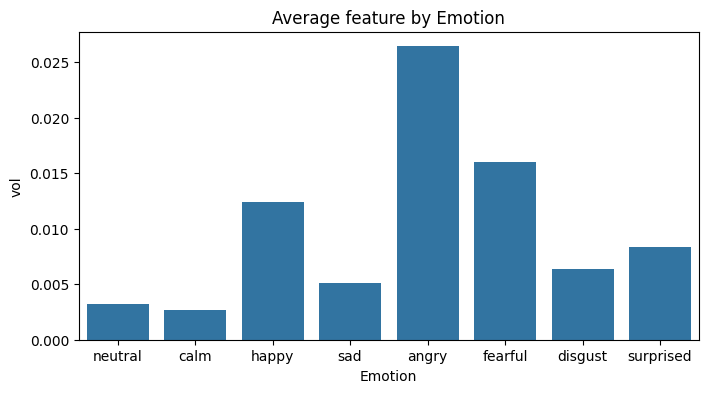

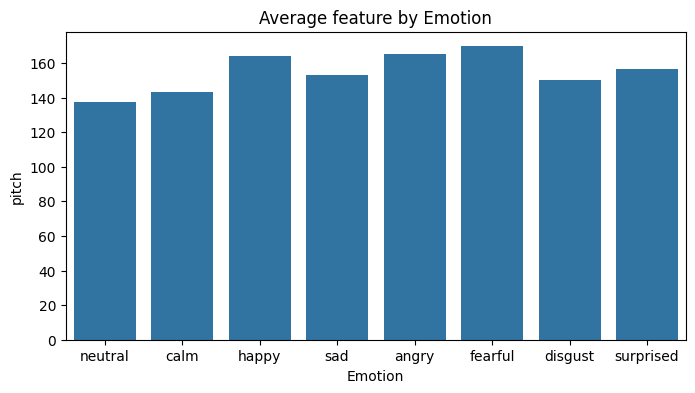

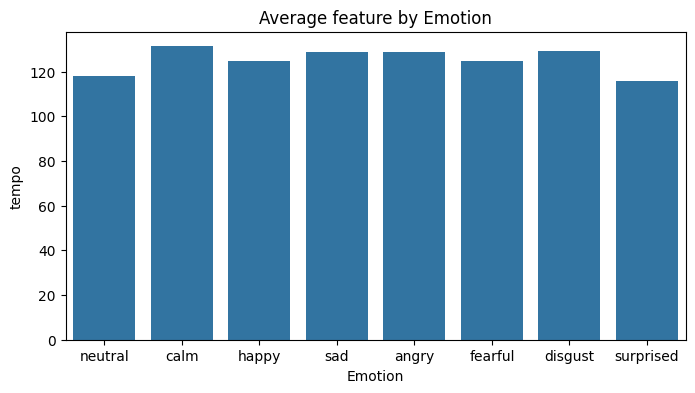

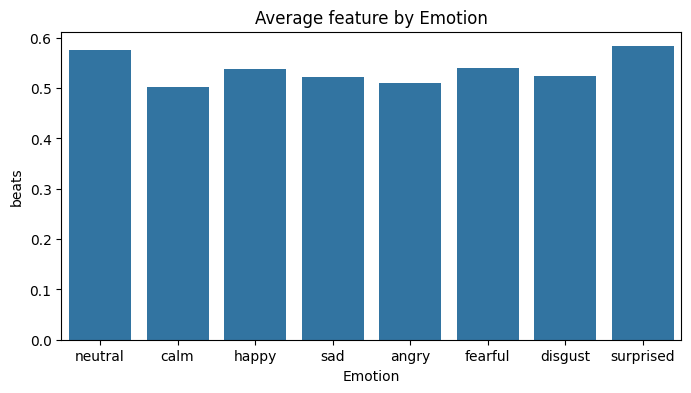

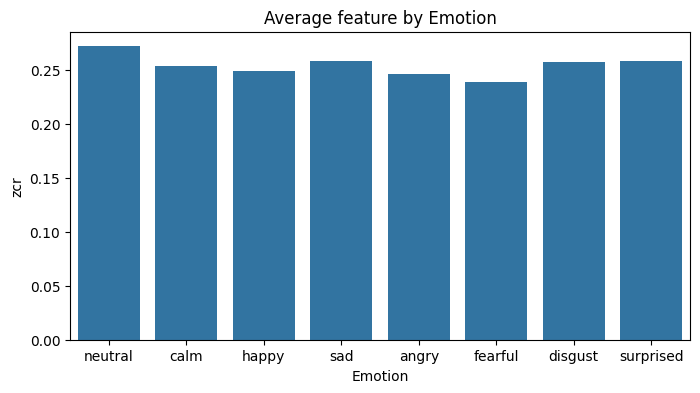

In [ ]:
for feature in mfcc_means.columns:
    plt.figure(figsize=(8,4))
    sns.barplot(x=emotion_map, y=mfcc_means[feature])
    plt.title(f"Average feature by Emotion")
    plt.ylabel(feature)
    plt.xlabel("Emotion")
    plt.show()

In [ ]:
df.to_csv("sound_features.csv")